In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.drop(columns=["Cabin"],inplace = True)
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#### Lets convert the categorical data to numerical feautures using encoding

In [4]:
# We will use 1 for male and 0 for female 

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [5]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [6]:
# One hot Encoding

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)
df['Pclass_2'] = df['Pclass_2'].astype(int)
df['Pclass_3'] = df['Pclass_3'].astype(int)


print(df.columns)


Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')


In [7]:
# 
df['Fare_log'] = np.log1p(df['Fare'])

### Dropping Irrelevant columns for Training

In [8]:
df.drop(['PassengerId', 'Name', 'Ticket','Fare'], axis=1, inplace=True)

In [9]:
df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'Fare_log'],
      dtype='object')

# Decision Tree

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,accuracy_score

x = df.drop("Survived",axis=1)
x = x.astype(float)

y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

decision_tree_model = DecisionTreeClassifier(max_depth=4,random_state=42)

decision_tree_model.fit(X_train,y_train) 

y_pred = decision_tree_model.predict(X_test)

train_acc = decision_tree_model.score(X_train, y_train)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Train Accuracy: 0.85
Test Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



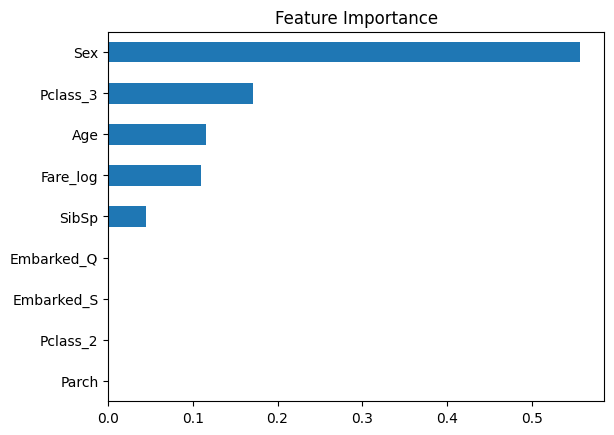

In [11]:
# Feauture Importance

pd.Series(decision_tree_model.feature_importances_,index=x.columns).sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()
importances = pd.Series(decision_tree_model.feature_importances_, index=x.columns)


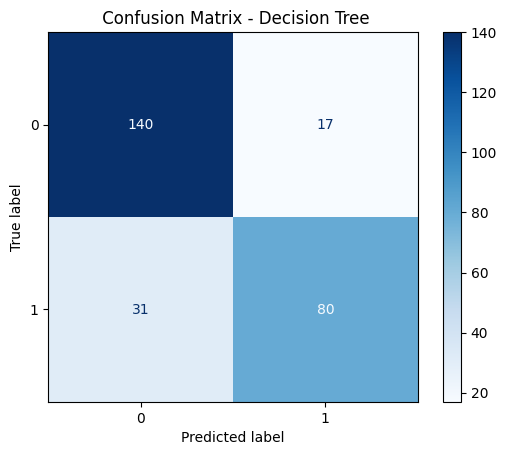

In [12]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred = decision_tree_model.predict(X_test)

c_matrix = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot(cmap="Blues")
plt.title(" Confusion Matrix - Decision Tree")
plt.show()

#  Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
                                             n_estimators=100,
                                             max_depth=4,
                                             min_samples_split=5,
                                             random_state=42)

random_forest_model.fit(X_train,y_train)

y_pred = random_forest_model.predict(X_test)

train_acc = random_forest_model.score(X_train, y_train)

print("Random Forest Classifier")
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier
Train Accuracy: 0.85
Test Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       157
           1       0.88      0.67      0.76       111

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4,5, 6, 8],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}


c:\Users\arsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


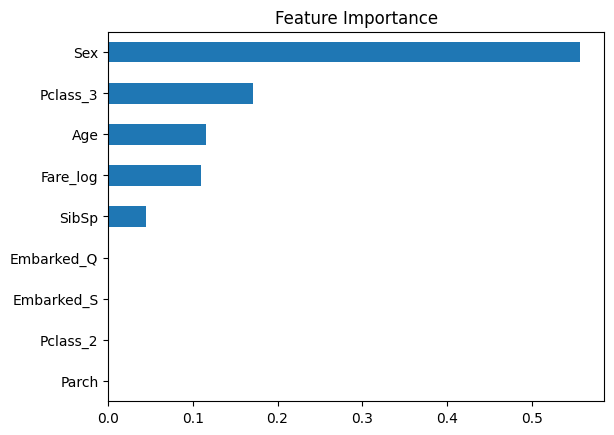

Sex           0.471903
Age           0.093624
SibSp         0.044017
Parch         0.035319
Embarked_Q    0.010673
Embarked_S    0.032974
Pclass_2      0.021206
Pclass_3      0.123675
Fare_log      0.166609
dtype: float64

In [15]:
# Feauture Importance

pd.Series(decision_tree_model.feature_importances_,index=x.columns).sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()
importances = pd.Series(random_forest_model.feature_importances_, index=x.columns)
importances


# Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score

c_scores = cross_val_score(random_forest_model,x,y,cv=5)
print(f'Cross Validation Score :{c_scores.mean():.2f}')

Cross Validation Score :0.82


In [17]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64

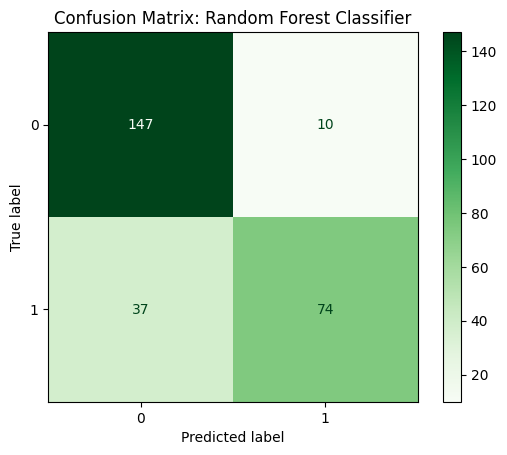

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

c_matrix = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=random_forest_model.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix: Random Forest Classifier")
plt.show()